In [1]:
%matplotlib inline
import math
import time
import numpy as np
from sklearn.linear_model import LinearRegression as SK_LinearRegression
import  statsmodels.api as sm 
import torch


In [2]:
import sys 

In [3]:
sys.path.append('../../../')

In [4]:
from omd2l.data import SyntheticRegressionData

In [5]:
from omd2l.models.base import Trainer

In [6]:
from omd2l.models.linear import LinearRegressionScratch
from omd2l.models.linear import LinearRegression

## Generate Synthetic data 

In [7]:
# help(d2l.SyntheticRegressionData)

In [8]:
synthetic_data_weights = torch.tensor([2, -3.4, 1, -8, 4, 3, -9, 1,  2, -6])
synthetic_data_b = 4.2
num_dim =  synthetic_data_weights.shape[0]

In [9]:
num_dim

10

In [10]:
data = SyntheticRegressionData(w=synthetic_data_weights, 
                                   b=synthetic_data_b,
                                  num_train=1000,
                                  num_val=1000,
                                  batch_size=100,
                                  noise=0.5)

In [11]:
data.X = data.X[:,:8]
num_dim =  data.X.shape[1]

In [12]:
data.y.shape

torch.Size([2000, 1])

## Linear regression using sklearn 

In [13]:
nX = data.X.detach().numpy()
ny = data.y.detach().numpy()

In [14]:
sk_model = SK_LinearRegression()
sk_model.fit(nX, ny)

LinearRegression()

In [15]:
sk_model.coef_, sk_model.intercept_

(array([[ 2.1097348 , -3.4043226 ,  0.85252446, -7.923267  ,  3.9446473 ,
          2.9660704 , -8.924294  ,  1.0569178 ]], dtype=float32),
 array([4.072785], dtype=float32))

## Linear regression using statsmodels

In [16]:
sm_mdl = sm.OLS(endog=ny, exog=sm.add_constant(nX)).fit()

In [17]:
sm_mdl.params

array([ 4.07278518,  2.10973484, -3.40431859,  0.85252293, -7.92326718,
        3.94464599,  2.96606842, -8.92429116,  1.05691474])

## Linear Regression from scratch 

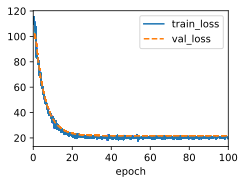

In [18]:
model_scratch = LinearRegressionScratch(num_inputs=num_dim, lr=0.01)
trainer = Trainer(max_epochs=100)
trainer.fit(model_scratch, data)

In [19]:
model_scratch.w, model_scratch.b

(tensor([[ 2.1587],
         [-3.4791],
         [ 0.9561],
         [-7.6883],
         [ 3.8284],
         [ 3.0269],
         [-8.9659],
         [ 0.8434]], requires_grad=True),
 tensor([4.3062], requires_grad=True))

## Linear Regression based on pytorch

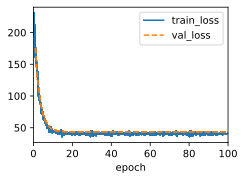

In [20]:
model = LinearRegression(lr=0.01)
trainer = Trainer(max_epochs=100)
trainer.fit(model, data)

In [21]:
model.get_w_b()

(tensor([[ 2.1588, -3.4847,  0.9526, -7.6882,  3.8250,  3.0226, -8.9613,  0.8459]]),
 tensor([4.3091]))